# Skaters (Season 2024/25) - Cumulative Distribution Function

## Step 0: Import libraries

In [36]:
import pandas as pd

In [37]:
from utils import df_utils, cdf_utils

## Step 1: Import the dataset

In [38]:
skaters_df = "https://moneypuck.com/moneypuck/playerData/seasonSummary/2024/regular/skaters.csv"
df = pd.read_csv(skaters_df)
df.head(5)

,playerId,season,name,team,position,situation,games_played,icetime,shifts,gameScore,...,OffIce_F_xGoals,OffIce_A_xGoals,OffIce_F_shotAttempts,OffIce_A_shotAttempts,xGoalsForAfterShifts,xGoalsAgainstAfterShifts,corsiForAfterShifts,corsiAgainstAfterShifts,fenwickForAfterShifts,fenwickAgainstAfterShifts
0,8478047,2024,Michael Bunting,NSH,L,other,76,2237.0,37.0,26.19,...,7.28,10.09,72.0,87.0,0.00,0.00,0.0,0.0,0.0,0.0
1,8478047,2024,Michael Bunting,NSH,L,all,76,70819.0,1474.0,43.70,...,161.54,187.75,3221.0,3522.0,0.00,0.00,0.0,0.0,0.0,0.0
2,8478047,2024,Michael Bunting,NSH,L,5on5,76,59813.0,1294.0,43.70,...,112.73,122.08,2661.0,2707.0,0.71,1.71,19.0,43.0,16.0,31.0
3,8478047,2024,Michael Bunting,NSH,L,4on5,76,6.0,2.0,2.58,...,0.20,0.17,4.0,11.0,0.00,0.00,0.0,0.0,0.0,0.0
4,8478047,2024,Michael Bunting,NSH,L,5on4,76,8763.0,141.0,36.88,...,23.81,2.60,311.0,54.0,0.00,0.01,0.0,1.0,0.0,1.0


## Step 2: Read the data

In [39]:
df_utils.print_df_size(df)

Number of samples: 4600
Number of features: 154


In [40]:
df_utils.save_column_names(df)

Saved: names_columns.txt


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Columns: 154 entries, playerId to fenwickAgainstAfterShifts
dtypes: float64(147), int64(3), object(4)
memory usage: 5.4+ MB


## Step 3: Data cleaning

In [42]:
# Missing values?
df_utils.report_nan(df)

No missing values found.


In [43]:
df = df_utils.drop_duplicate_columns(df, ["faceoffsWon", "I_F_faceOffsWon"])
df = df_utils.drop_duplicate_columns(df, [ "penalityMinutes", "I_F_penalityMinutes"])

Dropped columns: ['I_F_faceOffsWon']
Number of features: 153
Dropped columns: ['I_F_penalityMinutes']
Number of features: 152


## Step 4: Percentile Ranks and Cumulative Distribution Function

Reference player: **Auston Matthews**.

In [44]:
name_player="Auston Matthews"

### Goals

Auston Matthews - Percentile rank: 96.42
Median: 8.00
Interquartile range: 13.00
Quartile skewness: 0.38


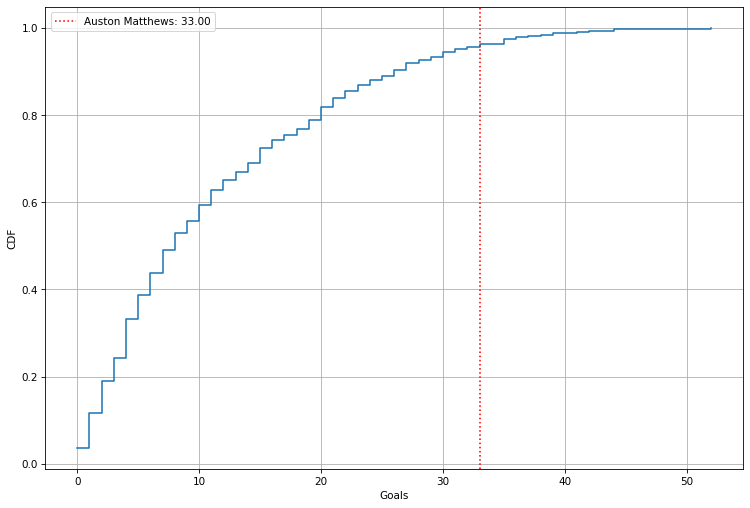

In [45]:
situation = "all"
feature = "I_F_goals"
min_games_played = 20

all_situations_df = df[(df["situation"] == situation) & (df["games_played"] >= min_games_played)]
vals = all_situations_df[feature].values
ref = all_situations_df[all_situations_df["name"]==name_player][feature].values[0]

cdf_utils.percentile_rank(ref, vals, label=name_player)
cdf_utils.plot_cdf(ref, vals, label=name_player, xlabel="Goals")

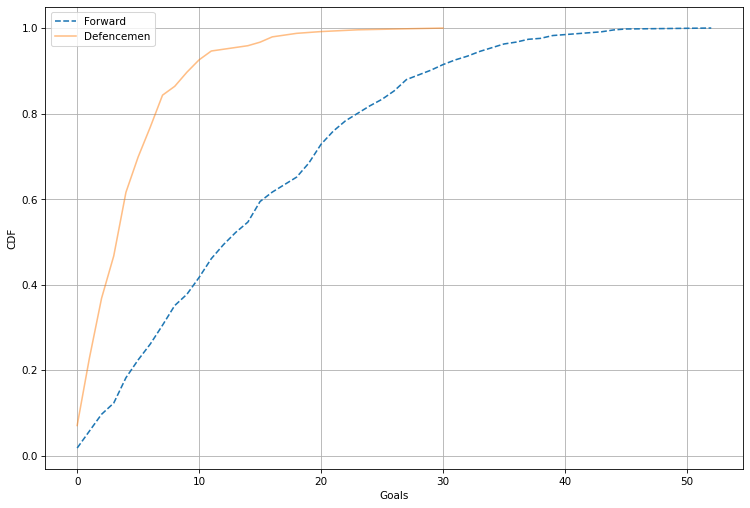

In [46]:
situation = "all"
feature = "I_F_goals"
min_games_played = 20

all_situations_df = df[(df["situation"] == situation) & (df["games_played"] >= min_games_played)]
vals1 = all_situations_df[all_situations_df["position"]!="D"][feature].values
vals2 = all_situations_df[all_situations_df["position"]=="D"][feature].values

cdf_utils.plot_two_cdfs(vals1, vals2, name1="Forward", name2="Defencemen", xlabel="Goals")

### Points

Auston Matthews - Percentile rank: 95.85
Median: 24.00
Interquartile range: 31.00
Quartile skewness: 0.23


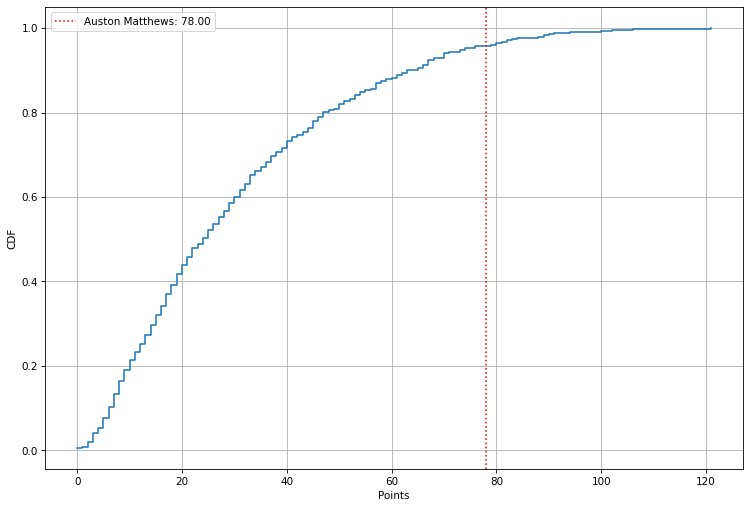

In [47]:
situation = "all"
feature = "I_F_points"
min_games_played = 20

all_situations_df = df[(df["situation"] == situation) & (df["games_played"] >= min_games_played)]
vals = all_situations_df[feature].values
ref = all_situations_df[all_situations_df["name"]==name_player][feature].values[0]

cdf_utils.percentile_rank(ref, vals, label=name_player)
cdf_utils.plot_cdf(ref, vals, label=name_player, xlabel="Points")

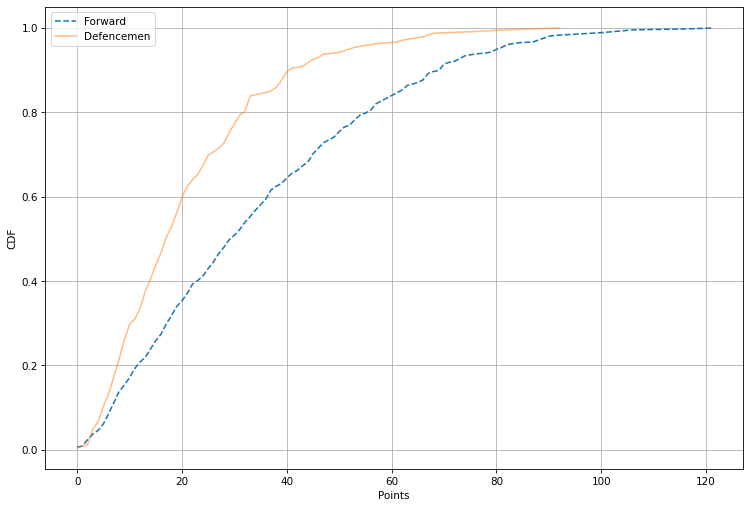

In [48]:
situation = "all"
feature = "I_F_points"
min_games_played = 20

all_situations_df = df[(df["situation"] == situation) & (df["games_played"] >= min_games_played)]
vals1 = all_situations_df[all_situations_df["position"]!="D"][feature].values
vals2 = all_situations_df[all_situations_df["position"]=="D"][feature].values

cdf_utils.plot_two_cdfs(vals1, vals2, name1="Forward", name2="Defencemen", xlabel="Points")

### Penality minutes

Auston Matthews - Percentile rank: 47.42
Median: 22.00
Interquartile range: 22.00
Quartile skewness: 0.27


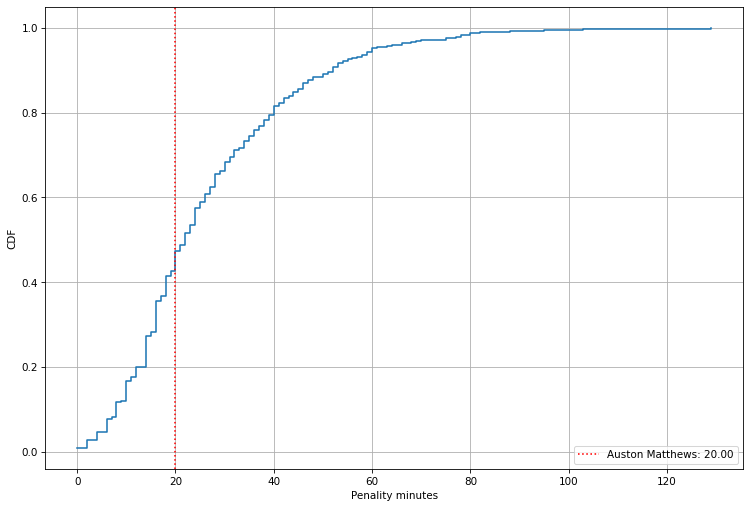

In [49]:
situation = "all"
feature = "penalityMinutes"
min_games_played = 20

all_situations_df = df[(df["situation"] == situation) & (df["games_played"] >= min_games_played)]
vals = all_situations_df[feature].values
ref = all_situations_df[all_situations_df["name"]==name_player][feature].values[0]

cdf_utils.percentile_rank(ref, vals, label=name_player)
cdf_utils.plot_cdf(ref, vals, label=name_player, xlabel="Penality minutes")

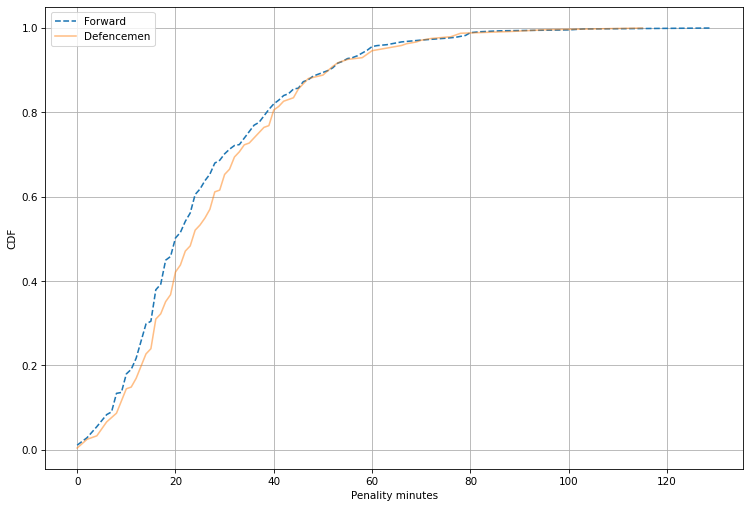

In [50]:
situation = "all"
feature = "penalityMinutes"
min_games_played = 20

all_situations_df = df[(df["situation"] == situation) & (df["games_played"] >= min_games_played)]
vals1 = all_situations_df[all_situations_df["position"]!="D"][feature].values
vals2 = all_situations_df[all_situations_df["position"]=="D"][feature].values

cdf_utils.plot_two_cdfs(vals1, vals2, name1="Forward", name2="Defencemen", xlabel="Penality minutes")

### Icetime

Auston Matthews - Percentile rank: 69.63
Median: 69042.00
Interquartile range: 39292.00
Quartile skewness: -0.16


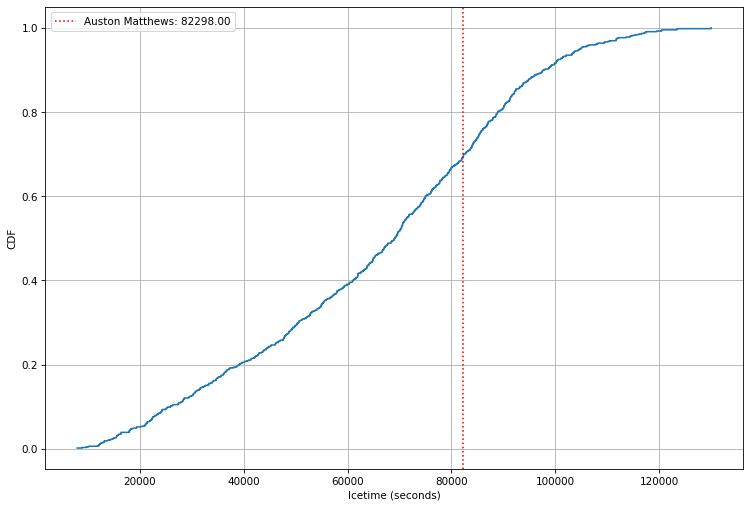

In [51]:
situation = "all"
feature = "icetime"
min_games_played = 20

all_situations_df = df[(df["situation"] == situation) & (df["games_played"] >= min_games_played)]
vals = all_situations_df[feature].values
ref = all_situations_df[all_situations_df["name"]==name_player][feature].values[0]

cdf_utils.percentile_rank(ref, vals, label=name_player)
cdf_utils.plot_cdf(ref, vals, label=name_player, xlabel="Icetime (seconds)")

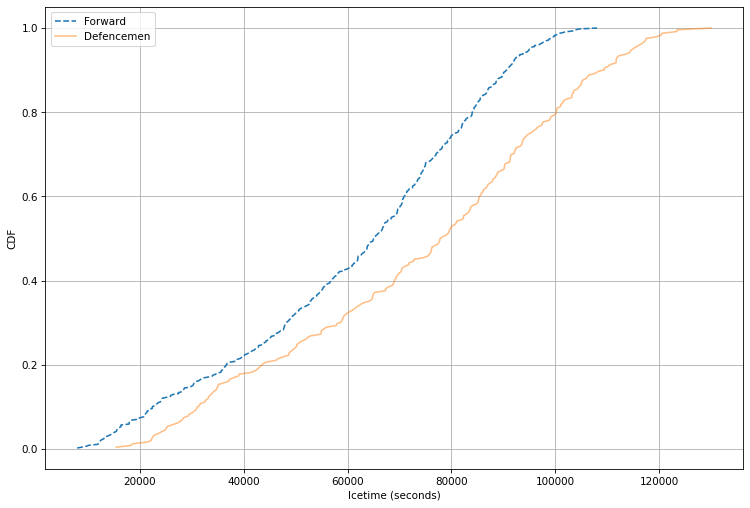

In [52]:
situation = "all"
feature = "icetime"
min_games_played = 20

all_situations_df = df[(df["situation"] == situation) & (df["games_played"] >= min_games_played)]
vals1 = all_situations_df[all_situations_df["position"]!="D"][feature].values
vals2 = all_situations_df[all_situations_df["position"]=="D"][feature].values

cdf_utils.plot_two_cdfs(vals1, vals2, name1="Forward", name2="Defencemen", xlabel="Icetime (seconds)")

### Hits

Auston Matthews - Percentile rank: 34.10
Median: 63.00
Interquartile range: 69.00
Quartile skewness: 0.22


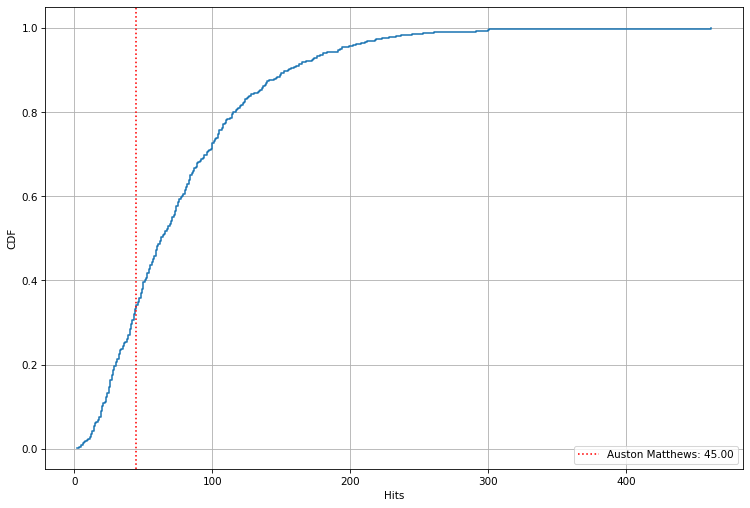

In [53]:
situation = "all"
feature = "I_F_hits"
min_games_played = 20

all_situations_df = df[(df["situation"] == situation) & (df["games_played"] >= min_games_played)]
vals = all_situations_df[feature].values
ref = all_situations_df[all_situations_df["name"]==name_player][feature].values[0]

cdf_utils.percentile_rank(ref, vals, label=name_player)
cdf_utils.plot_cdf(ref, vals, label=name_player, xlabel="Hits")

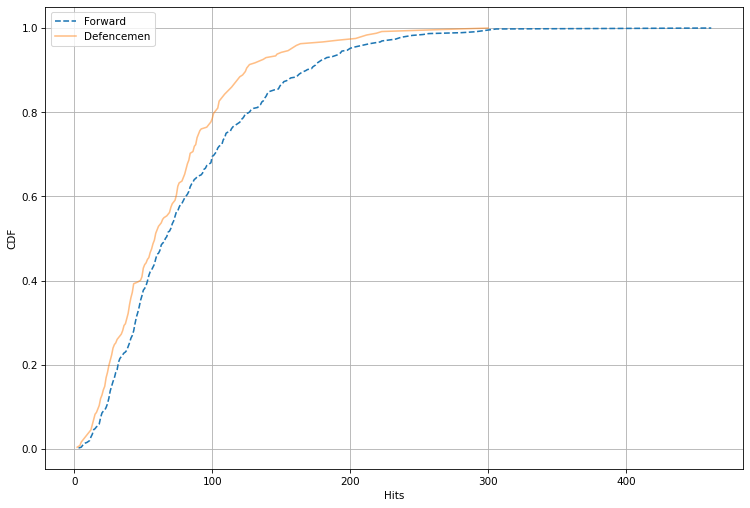

In [54]:
situation = "all"
feature = "I_F_hits"
min_games_played = 20

all_situations_df = df[(df["situation"] == situation) & (df["games_played"] >= min_games_played)]
vals1 = all_situations_df[all_situations_df["position"]!="D"][feature].values
vals2 = all_situations_df[all_situations_df["position"]=="D"][feature].values

cdf_utils.plot_two_cdfs(vals1, vals2, name1="Forward", name2="Defencemen", xlabel="Hits")

### Blocked shot attempts

Auston Matthews - Percentile rank: 82.52
Median: 55.00
Interquartile range: 50.00
Quartile skewness: 0.08


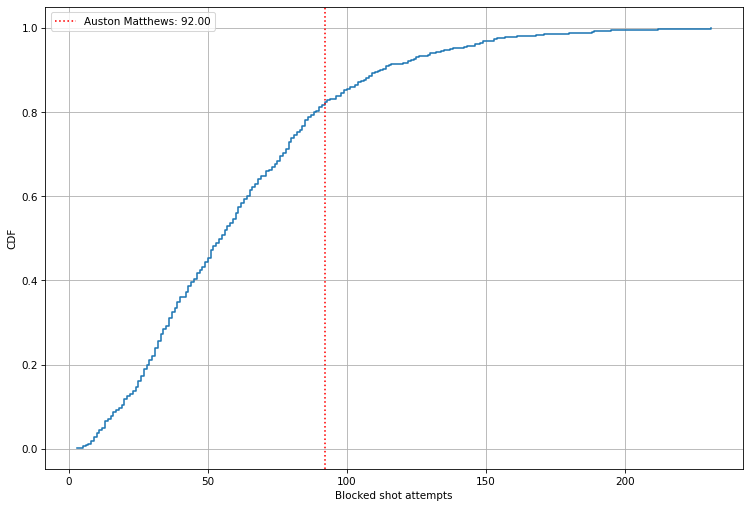

In [55]:
situation = "all"
feature = "I_F_blockedShotAttempts"
min_games_played = 20

all_situations_df = df[(df["situation"] == situation) & (df["games_played"] >= min_games_played)]
vals = all_situations_df[feature].values
ref = all_situations_df[all_situations_df["name"]==name_player][feature].values[0]

cdf_utils.percentile_rank(ref, vals, label=name_player)
cdf_utils.plot_cdf(ref, vals, label=name_player, xlabel="Blocked shot attempts")

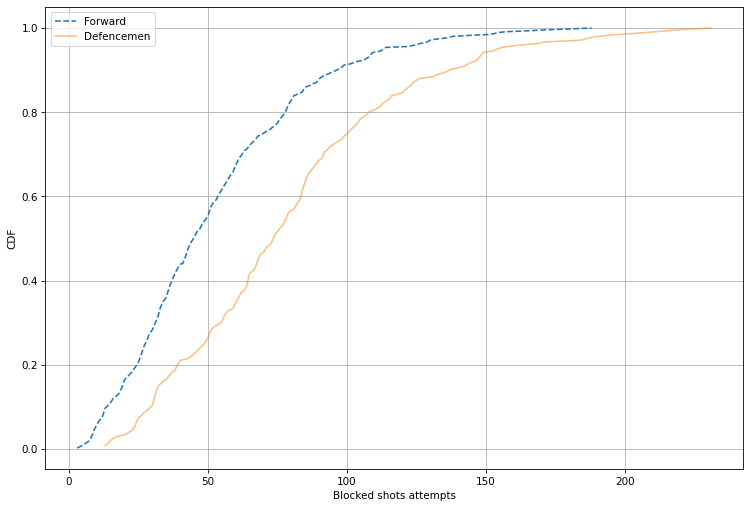

In [56]:
situation = "all"
feature = "I_F_blockedShotAttempts"
min_games_played = 20

all_situations_df = df[(df["situation"] == situation) & (df["games_played"] >= min_games_played)]
vals1 = all_situations_df[all_situations_df["position"]!="D"][feature].values
vals2 = all_situations_df[all_situations_df["position"]=="D"][feature].values

cdf_utils.plot_two_cdfs(vals1, vals2, name1="Forward", name2="Defencemen", xlabel="Blocked shots attempts")

### Expected goals

Auston Matthews - Percentile rank: 100.00
Median: 8.77
Interquartile range: 13.58
Quartile skewness: 0.27


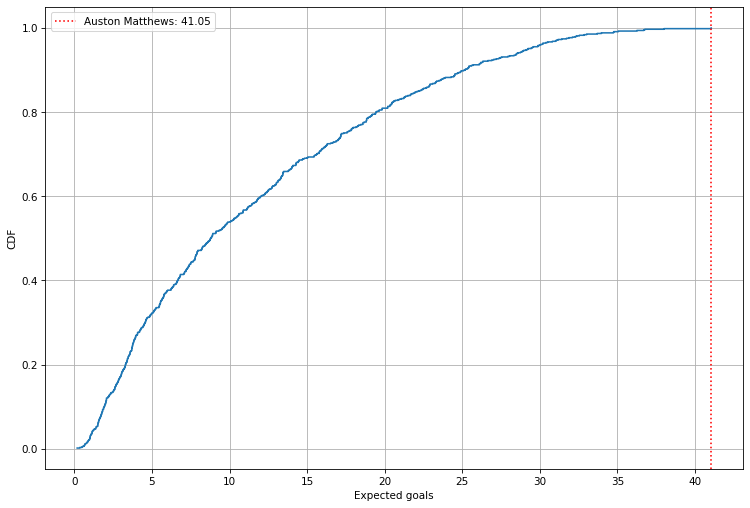

In [57]:
situation = "all"
feature = "I_F_xGoals"
min_games_played = 20

all_situations_df = df[(df["situation"] == situation) & (df["games_played"] >= min_games_played)]
vals = all_situations_df[feature].values
ref = all_situations_df[all_situations_df["name"]==name_player][feature].values[0]

cdf_utils.percentile_rank(ref, vals, label=name_player)
cdf_utils.plot_cdf(ref, vals, label=name_player, xlabel="Expected goals")

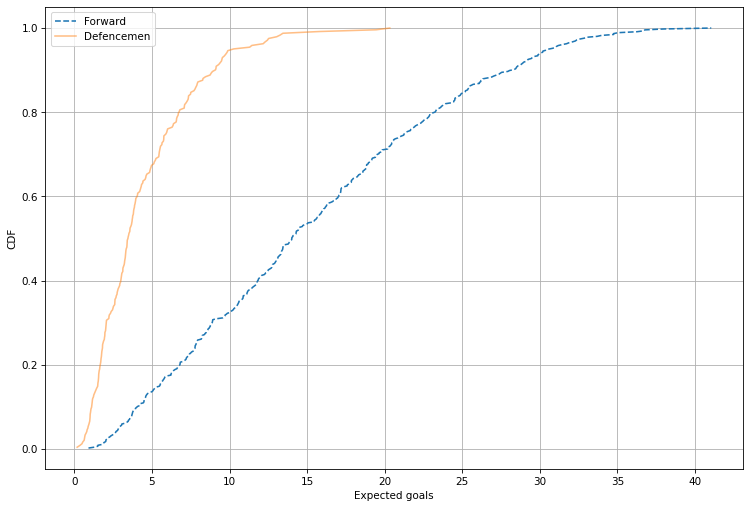

In [58]:
situation = "all"
feature = "I_F_xGoals"
min_games_played = 20

all_situations_df = df[(df["situation"] == situation) & (df["games_played"] >= min_games_played)]
vals1 = all_situations_df[all_situations_df["position"]!="D"][feature].values
vals2 = all_situations_df[all_situations_df["position"]=="D"][feature].values

cdf_utils.plot_two_cdfs(vals1, vals2, name1="Forward", name2="Defencemen", xlabel="Expected goals")

### Faceoff win rate

Auston Matthews - Percentile rank: 93.42
Median: 0.45
Interquartile range: 0.16
Quartile skewness: -0.27


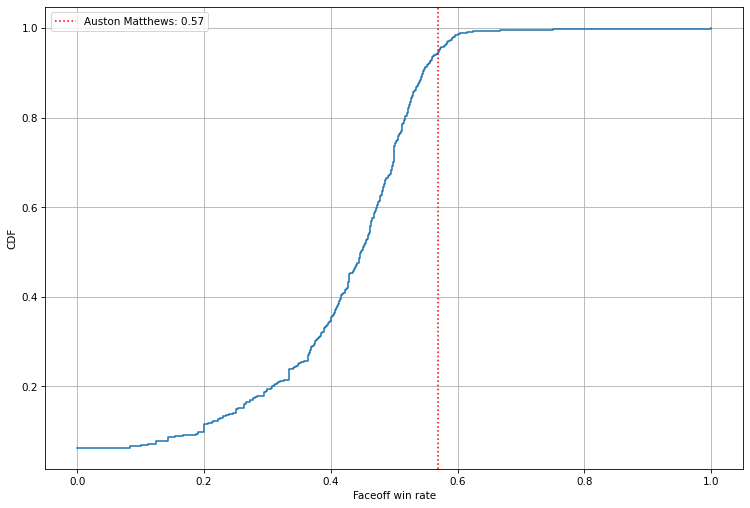

In [59]:
situation = "all"
feature1 = "faceoffsWon"
feature2 = "faceoffsLost"
new_feature = "faceoffs_win_rate"
min_games_played = 20

all_situations_df = df[(df["situation"] == situation) & (df["games_played"] >= min_games_played) & (df["position"]!="D")].copy()

all_situations_df["faceoff_total"] = all_situations_df[feature1] + all_situations_df[feature2]
all_situations_df[new_feature] = all_situations_df[feature1] / all_situations_df["faceoff_total"]

vals = all_situations_df[new_feature].values
ref = all_situations_df[all_situations_df["name"]==name_player][new_feature].values[0]

cdf_utils.percentile_rank(ref, vals, label=name_player)
cdf_utils.plot_cdf(ref, vals, label=name_player, xlabel="Faceoff win rate")
